In [27]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

pca = PCA(n_components=2)

In [63]:
df_raw = pd.read_pickle('sources/dataset_integrado.pickle')
df_tracks_raw = pd.read_pickle('features/tracks.pickle')

In [71]:
df_raw
df_raw["id"]

KeyError: 'id'

In [66]:
df_tracks_raw.describe()

,disc_number,duration_ms,popularity,track_number
count,4092.000000,4.092000e+03,4092.000000,4092.000000
mean,1.089932,2.904784e+05,18.982649,6.041544
std,0.868654,1.629239e+05,20.722773,5.957745
min,1.000000,3.070600e+04,0.000000,1.000000
25%,1.000000,1.961705e+05,0.000000,2.000000
50%,1.000000,2.562740e+05,14.000000,4.000000
75%,1.000000,3.415765e+05,33.000000,9.000000
max,50.000000,3.650800e+06,86.000000,74.000000


In [70]:
df_tracks_raw.isin(df_raw)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,is_local,name,popularity,preview_url,track_number,type,uri,genre
id,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
3X3p3u03P8eFL8WTH0oaaU,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
4KlXeaheot0OI9PoOWspvZ,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
3j76McoUI18gDoqxYE14Bu,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
4zxd4tiXPlWMqoJltbVTbE,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5vSsQH8wH68PDKJbNfxzpc,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
7xYKAlU77jAAnAixQ5IgSn,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True
4hXEgyy5nNgdiBvJcJ9o8u,True,True,True,True,True,True,False,False,False,True,True,True,False,True,False,False,True


In [68]:
df_tracks_raw[~df_raw.isin(df_tracks_raw)].dropna()
df_tracks_raw.describe()

,disc_number,duration_ms,popularity,track_number
count,4092.000000,4.092000e+03,4092.000000,4092.000000
mean,1.089932,2.904784e+05,18.982649,6.041544
std,0.868654,1.629239e+05,20.722773,5.957745
min,1.000000,3.070600e+04,0.000000,1.000000
25%,1.000000,1.961705e+05,0.000000,2.000000
50%,1.000000,2.562740e+05,14.000000,4.000000
75%,1.000000,3.415765e+05,33.000000,9.000000
max,50.000000,3.650800e+06,86.000000,74.000000


In [73]:
df_tracks_raw.`id`

SyntaxError: invalid syntax (<ipython-input-73-89842254c126>, line 1)

In [57]:
df_tracks_raw.genre.unique()

array(['singer-songwriter', 'opera', 'trance'], dtype=object)

In [58]:
# creating a dict file  
genre = {'jazz': 1,'classical' : 2, 'drum-and-bass' : 3, 'death-metal' : 4, 'ambient' : 5,
       'ska' : 6, 'singer-songwriter' : 7, 'opera' : 8, 'trance' : 9} 
df_tracks_raw.genre = [genre[item] for item in df_tracks_raw.genre] 


In [59]:
k = 8

In [60]:
X = np.array(df_raw[["t02_75","t03_75","t04_75","t05_75","t06_75","t07_75","t08_75","t09_75","t10_75","t11_75"]])
y = np.array(df_tracks_raw['genre'])
X.shape

(4082, 10)

ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 4082.

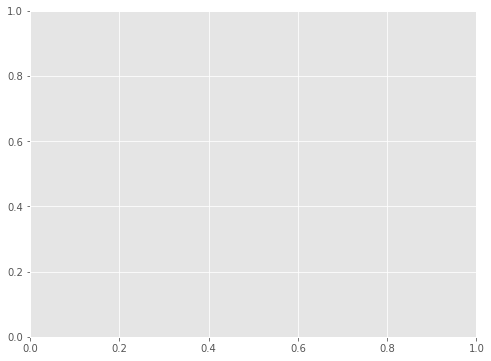

In [61]:
# Proyecto los datos sobre PC_1 y PC_2 para graficar
pca.fit(X)
x_pca = pca.transform(X)

# Grafico los datos con las etiquetas originales
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, alpha = 0.5, edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [20]:
kmeans = KMeans(n_clusters=k).fit(X)

([], <a list of 0 Text major ticklabel objects>)

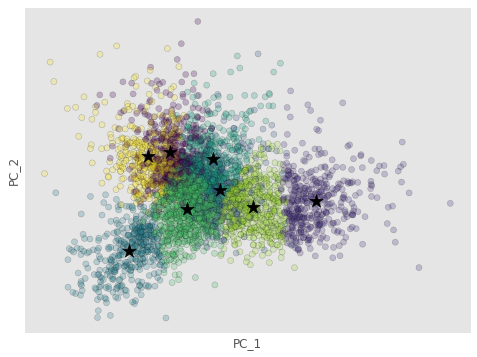

In [21]:
centroides_sklean_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=kmeans.labels_, alpha=.25, edgecolor='k')
plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())